MSAP LV3 LUKŠA ANDRAČIĆ
STATISTIČKO ZAKLJUČIVANJE

Cilj vježbe je odraditi zadane zadatke kako bi naučili koristiti određene metode statističke analize podataka i kako bi se upoznali sa statističkim zaključianjem.





1. ZADATAK:

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import array as arr
from math import sqrt

papir1_masa = [3.481, 3.477, 3.47, 3.448, 3.472, 3.47, 3.485, 3.464, 3.477, 3.475, 3.472, 3.473, 3.472, 3.47, 3.474]
papir2_masa = [3.258, 3.254, 3.256, 3.249, 3.241, 3.254, 3.247, 3.257, 3.239, 3.25, 3.258, 3.239, 3.245, 3.24, 3.254]

t_stat, p_value = stats.ttest_ind(papir1_masa, papir2_masa)
print(t_stat, p_value)


78.71035558431097 2.08593386840301e-34


Uzororci su nezavisni i normalno distribuirani skupovi podataka koji sadrže informacije i masi papira vaganih više puta(15). T-testom za razinu značajnosti od 5% dolazimo do zaključka da možemo odbaciti nultu hipotezu, tj. možemo reći da mase papira nisu jednake. T-testom za razinu značajnosti od 1% dolazimo do zaključka da možemo odbaciti nultu hipotezu, tj. možemo reći da mase papira nisu jednake.

Rezlutati donose isti zaključak jer je p vrijednost manja u oba slučaja.

In [ ]:
raz1 = 0.95
raz2 = 0.99

alfa1 = 1 - raz1
alfa2 = 1 - raz2

crit_value1 = 2.131
crit_value2 = 2.947

dof = len(papir1_masa) + len(papir2_masa) - 2
t_value1=stats.t.ppf(1-alfa1/2, dof)
print("t value", t_value1)

dof = len(papir1_masa) + len(papir2_masa) - 2
t_value2=stats.t.ppf(1-alfa2/2, dof)
print("t value", t_value2)



length1 = len(papir1_masa)
length2 = len(papir2_masa)
srvr1 = np.mean(papir1_masa)
srvr2 = np.mean(papir2_masa)
stddv1 = np.std(papir1_masa)
stddv2 = np.std(papir2_masa)
print("Means:")
print(srvr2)
print(srvr1)
print("Standard deviations:")
print(stddv1)
print(stddv2)
print("Lenghts:")
print(length1)
print(length2)

Sp = sqrt(1/length1 + 1/length2) * sqrt(stddv1**2/length1 + stddv2**2/length2)

StdError=Sp*sqrt(1/length1 + 1/length2)
print("Sandard error:", StdError)

conf_int1 = (srvr1 - srvr2) - t_value1*StdError, (srvr1 - srvr2) + t_value1*StdError
conf_int2 = (srvr1 - srvr2) - t_value2*StdError, (srvr1 - srvr2) + t_value2*StdError

a=(srvr1 - srvr2) + t_value1*StdError - (srvr1 - srvr2)
b=(srvr1 - srvr2) + t_value2*StdError - (srvr1 - srvr2)
print(a, b)
print(srvr1 - srvr2)



print("5% interval pouzdanosti", conf_int1)
print("1% interval pouzdanosti", conf_int2)



t value 2.048407141795244
t value 2.763262455461066
Means:
3.2493999999999996
3.472
Standard deviations:
0.008024961059095524
0.006897342483401358
Lenghts:
15
15
Sandard error: 0.000364292651315489
0.0007462196686581768 0.0010066362061804668
0.22260000000000035
5% interval pouzdanosti (0.22185378033134218, 0.22334621966865853)
1% interval pouzdanosti (0.2215933637938199, 0.22360663620618082)


95% smo sigurno da je razlika u masi papira1 i papira2 u intervalu (0.22185378033134218, 0.22334621966865853). Interval ne sadrži null vrijednost i odbacujemo nultu hipotezu, tj. mase nisu jednake.

99% smo sigurno da je razlika u masi papira1 i papira2 u intervalu (0.2215933637938199, 0.22360663620618082) Interval ne sadrži null vrijednost i odbacujemo nultu hipotezu, tj. mase nisu jednake.

Metode korištene za izračun potrevnih parametara su djelomično ugrašene metode iz python biblioteka(numpy, spicy, math), a dio je računat "ručno" pomoču formula.

ZADATAK 2:

In [3]:
import pandas as pd

# Reload the dataset as the session has been reset
file_path_dataset = '/content/ispitanici.xlsx'
data = pd.read_excel(file_path_dataset)

# Display the first few rows of the dataset to understand its structure
data.head()

# Descriptive statistics for "Pre" and "Post"
pre_stats = data['Pre'].describe()
post_stats = data['Post'].describe()

# Compute range for "Pre" and "Post"
pre_range = data['Pre'].max() - data['Pre'].min()
post_range = data['Post'].max() - data['Post'].min()

# Add range information to descriptive statistics
pre_stats['Range'] = pre_range
post_stats['Range'] = post_range

pre_stats, post_stats

(count    60.000000
 mean     37.400000
 std      10.512624
 min      11.000000
 25%      31.000000
 50%      36.000000
 75%      46.000000
 max      56.000000
 Range    45.000000
 Name: Pre, dtype: float64,
 count    60.000000
 mean     43.850000
 std      12.802046
 min      11.000000
 25%      35.750000
 50%      43.500000
 75%      53.000000
 max      67.000000
 Range    56.000000
 Name: Post, dtype: float64)

Rezultati prije intervencije (Pre):
Prosjek: 37.40, Medijan: 36, Raspon: 45
Rezultati poslije intervencije (Post):
Prosjek: 43.85, Medijan: 43.5, Raspon: 56

In [4]:
from scipy.stats import shapiro

# Test for normality using Shapiro-Wilk test
shapiro_pre = shapiro(data['Pre'])
shapiro_post = shapiro(data['Post'])

# Results of the Shapiro-Wilk test
shapiro_results = {
    "Pre": {"statistic": shapiro_pre.statistic, "p-value": shapiro_pre.pvalue},
    "Post": {"statistic": shapiro_post.statistic, "p-value": shapiro_post.pvalue}
}

shapiro_results

{'Pre': {'statistic': 0.9679852884200666, 'p-value': 0.11620561928825013},
 'Post': {'statistic': 0.9842729324869284, 'p-value': 0.6323036477521675}}

Shapiro-Wilk test pokazao je da su podaci za oba seta (Pre i Post) normalno distribuirani (p-vrijednosti > 0.05).

In [5]:
from scipy.stats import ttest_rel

# Paired t-test for Pre and Post
t_stat, p_value = ttest_rel(data['Pre'], data['Post'])

# Results of the t-test
t_test_results = {"t-statistic": t_stat, "p-value": p_value}
t_test_results


{'t-statistic': -7.091086459674953, 'p-value': 1.8967651553056133e-09}

Proveden je t-test za ovisne uzorke:
t-statistika: -7.09
p-vrijednost:
1.90×10−9
1.90×10−9

Rezultati ukazuju na statistički značajnu razliku između rezultata prije i poslije intervencije (p < 0.05).

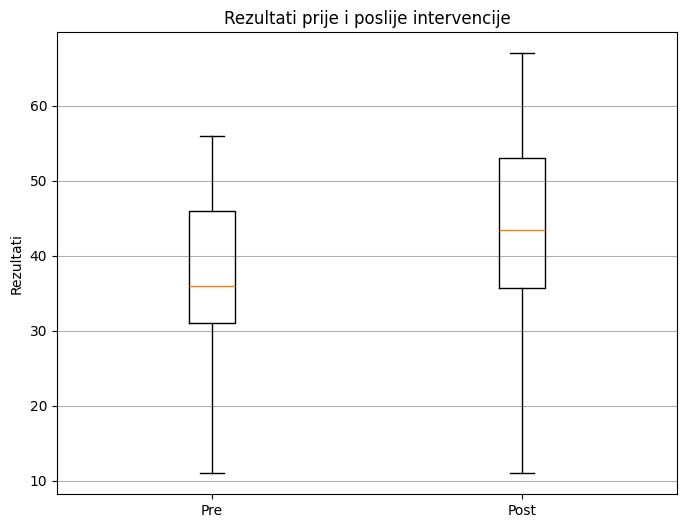

In [6]:
import matplotlib.pyplot as plt

# Create a boxplot to visualize the difference between Pre and Post results
plt.figure(figsize=(8, 6))
plt.boxplot([data['Pre'], data['Post']], labels=['Pre', 'Post'])
plt.title("Rezultati prije i poslije intervencije")
plt.ylabel("Rezultati")
plt.grid(axis='y')
plt.show()


Postoji statistički značajna razlika između rezultata prije i poslije intervencije, što sugerira da je program imao pozitivan učinak na rezultate ispitanika.